<a href="https://colab.research.google.com/github/Konwalai1111/BSC_DPDM2025/blob/main/Ch5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [8]:
from sklearn.datasets import load_digits#scikit_learn

digits = load_digits()
X,y = digits.data, digits.target

print(f"Shape of data: {X.shape}")
print(f"Shape of target: {y.shape}")
print(f"Number of classes: {len(digits.target_names)}")
print(f"First 5 target labels: {y[:5]}")

Shape of data: (1797, 64)
Shape of target: (1797,)
Number of classes: 10
First 5 target labels: [0 1 2 3 4]


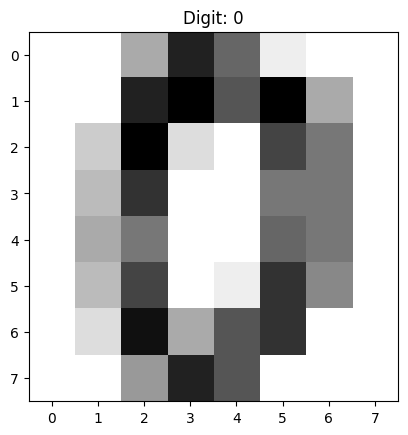

In [11]:
import matplotlib.pyplot as plt

first_image = X[0]
first_label = y[0]

image_reshaped = first_image.reshape(8, 8)

plt.imshow(image_reshaped, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Digit: {first_label}")
plt.show()

Shape of data: (1797, 64)
Shape of target: (1797,)
Number of classes: 10


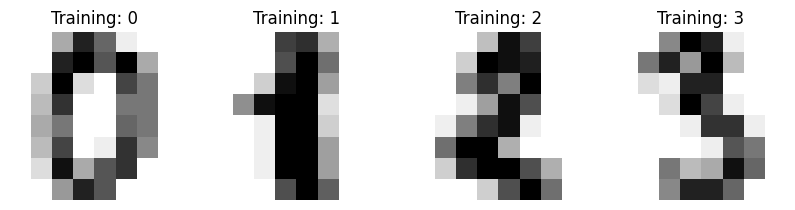

In [2]:
from sklearn.datasets import load_digits

# Load the MNIST dataset (a subset of the full MNIST dataset)
mnist = load_digits()

# Display the shape of the data and target
print(f"Shape of data: {mnist.data.shape}")
print(f"Shape of target: {mnist.target.shape}")

# You can also see the number of classes and some images if needed
print(f"Number of classes: {len(mnist.target_names)}")
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, mnist.images, mnist.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")
plt.show()

In [13]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [20]:
import pandas as pd

df = pd.DataFrame(digits.data)
df['target'] = digits.target

print("DataFrame create successfully with shape:", df.shape)
df.head()

DataFrame create successfully with shape: (1797, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [21]:
X.shape

(1797, 64)

In [23]:
X_train = X[:1700]
y_train = y[:1700]
X_test = X[1700:]
y_test = y[1700:]

# Model Construction

- import
- define (hyper-parameter)
- train (fitting)
- evoluate (train vs. test)

## import

In [24]:
from sklearn.tree import DecisionTreeClassifier

## define

In [50]:
tree0 = DecisionTreeClassifier(random_state=6)

## training

In [37]:
tree0.fit(X_train,y_train)

DecisionTreeClassifier(random_state=6)

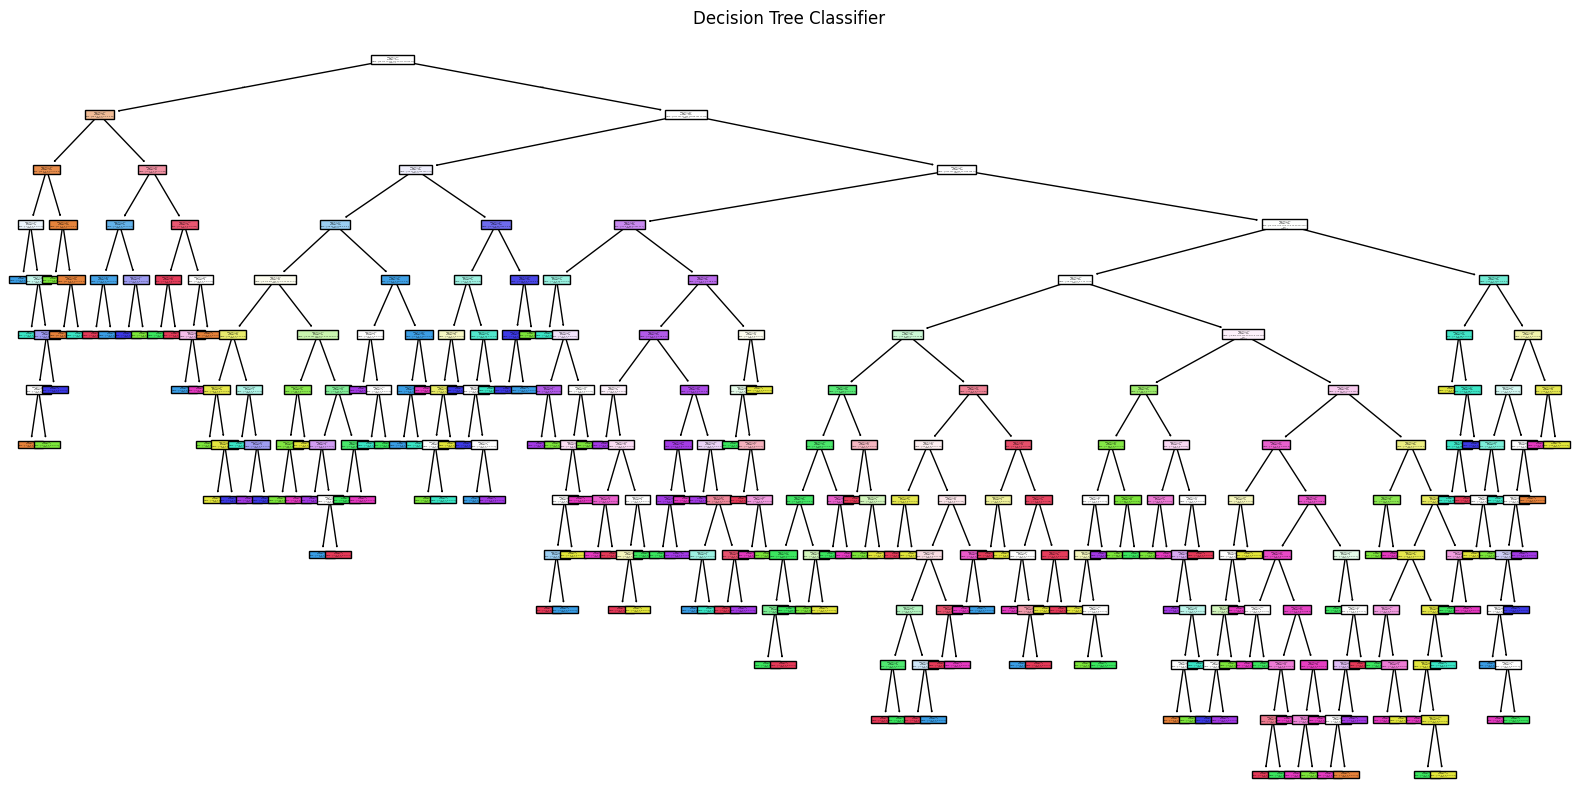

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree0, filled=True, feature_names=[f'pixel_{i}' for i in range(X.shape[1])], class_names=[str(i) for i in range(len(digits.target_names))])
plt.title("Decision Tree Classifier")
plt.show()

## Evoluate

In [40]:
train_accuracy = tree0.score(X_train, y_train)
test_accuracy = tree0.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.7938


In [41]:
y_predict = tree0.predict(X_test)

In [42]:
y_predict

array([8, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 9, 5, 1, 0, 0, 6, 2, 7, 8, 2,
       0, 3, 8, 6, 8, 8, 7, 4, 3, 4, 6, 6, 6, 4, 9, 1, 9, 0, 9, 6, 7, 8,
       2, 0, 0, 6, 7, 6, 8, 2, 1, 7, 4, 6, 3, 1, 2, 9, 1, 7, 6, 8, 4, 8,
       1, 4, 0, 5, 5, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 5, 2, 2, 5, 7, 9, 4,
       4, 3, 3, 4, 9, 0, 8, 9, 8])

In [43]:
y_test

array([5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2,
       0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8,
       2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3,
       1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 8, 8, 4, 9, 0, 8, 9, 8])

In [44]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7938


In [45]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_predict, target_names=[str(i) for i in digits.target_names]))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.80      0.89        10
           2       0.88      0.70      0.78        10
           3       0.40      0.20      0.27        10
           4       0.83      1.00      0.91        10
           5       0.71      0.56      0.62         9
           6       0.77      1.00      0.87        10
           7       0.91      1.00      0.95        10
           8       0.54      0.70      0.61        10
           9       0.82      1.00      0.90         9

    accuracy                           0.79        97
   macro avg       0.79      0.80      0.78        97
weighted avg       0.78      0.79      0.78        97



## Pre-pruning (hyper-parameter tuning)

In [47]:
from sklearn.tree import DecisionTreeClassifier #import
tree1 = DecisionTreeClassifier(random_state=6, max_depth=3) #define
tree1.fit(X_train,y_train) #train

DecisionTreeClassifier(max_depth=3, random_state=6)

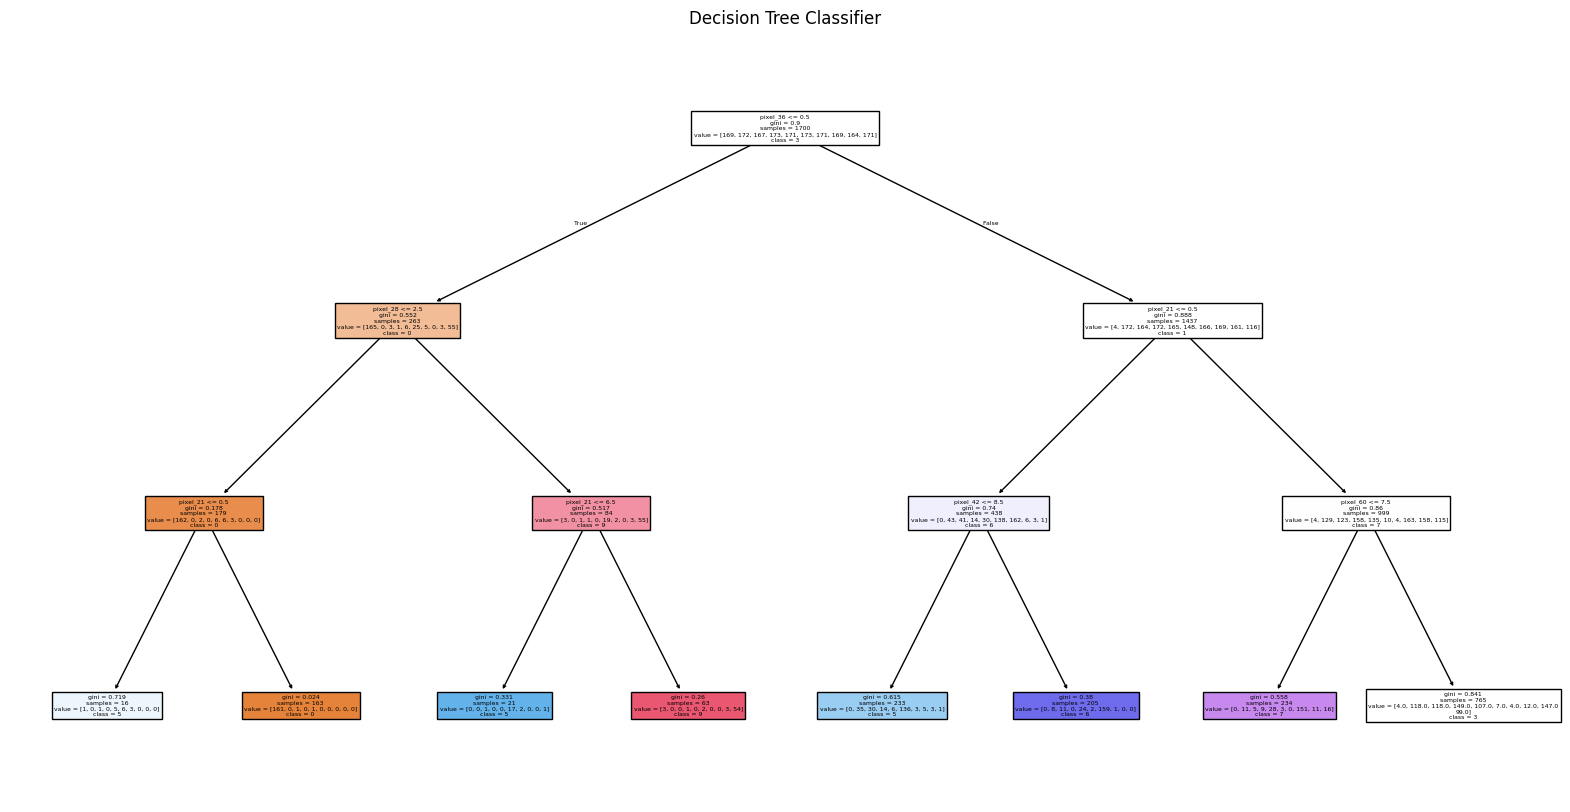

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree1, filled=True, feature_names=[f'pixel_{i}' for i in range(X.shape[1])], class_names=[str(i) for i in range(len(digits.target_names))])
plt.title("Decision Tree Classifier")
plt.show()

## Evaluate

In [53]:
accuracy = tree1.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.4639


## Tree 2

In [54]:
from sklearn.tree import DecisionTreeClassifier #import
tree2 = DecisionTreeClassifier(random_state=6, max_depth=7) #define
tree2.fit(X_train,y_train) #train
accuracy = tree2.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7938


#Quiz 11

In [59]:
X1_train = X[:1750]
y1_train = y[:1750]
X1_test = X[1750:]
y1_test = y[1750:]

In [66]:
from sklearn.tree import DecisionTreeClassifier #import
tree3 = DecisionTreeClassifier(random_state=6, max_depth=9) #define
tree3.fit(X1_train,y1_train) #train
accuracy = tree3.score(X1_test, y1_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8936
